# Problem 3
Equimolar Diffusion
## Problem 3.1.a
Determine $t$ when $x_{Xe}=0.6$ in bulb 1

Starting with an integral mol balance,
$$
\frac{d}{dt}\int c_{Xe}dV = -\int x_{Xe}cv_M\cdot adS-\int J_{Xe}\cdot adS+\int S_{Xe}dV \tag{1}
$$
we know that $v_M=0$ and there is no reaction so ([1](#mjx-eqn-1)) goes to
$$
\frac{d}{dt}\int c_{Xe}dV =-\int J_{Xe}\cdot adS
$$
which can be evaluated to be
$$
cV_0\frac{dx_{Xe}^0}{dt} = J_{Xe}^0A_c \tag{2}
$$
Since $N=0$ the following relationship holds
$$
N_{Xe} = x_{Xe}N+J_{Xe} = J_{Xe} \tag{3}
$$
so ([2](#mjx-eqn-2)) becomes
$$
cV_0\frac{dx_{Xe}^0}{dt} = N_{Xe}A_c \tag{4}
$$

In is also true that
$$
A_cJ_{Xe}^0 = A_cJ_{Xe}^L
$$
which implies that $J_{Xe}$ and $N_{Xe}$ are constant.
</br></br>
Using Fick's law to find $N_{Xe}$
$$
J_{Xe} = N_{Xe} = -cD_{AB}\frac{dx_{Xe}}{dz}
$$
rearranged is
$$
N_{Xe}\int_0^L dz = -cD_{AB}\int_0^L dx_{Xe}
$$
and evaluate to get
$$
N_{Xe} = \frac{-cD_{AB}}{L}(x_{Xe}^L-x_{Xe}^0) \tag{5}
$$
where L is the length of the tube

Now ([5](#mjx-eqn-5)) can be substituted in for ([4](#mjx-eqn-4)) to get
$$
V_0\frac{dx_{Xe}^0}{dt} = \frac{A_cD_{AB}}{L}(x_{Xe}^L-x_{Xe}^0) \tag{6}
$$
$x_{Xe}^L$ can be found by doing a total mol balance on both bulbs,
$$
cx_{Xe}^0V_0+cx_{Xe}^LV_L = cx_{Xe}^{\infty}(V_0+V_L)
$$
which is rearranged to get
$$
x_{Xe}^L = x_{Xe}^\infty(1+\frac{V_0}{V_L})-x_{Xe}^0\frac{V_0}{V_L} \tag{7}
$$

([7](#mjx-eqn-7)) can be inserted into ([6](#mjx-eqn-6)) and evaluated to get
$$
x_{Xe}^0 = x_{Xe}^\infty + (x_{Xe_0}-x_{Xe}^\infty )\exp(-\beta D_{AB}t) \tag{8}
$$
where
$$
\beta = \frac{A_c}{V_0L}(1+\frac{V_0}{V_L})
$$
$x_{Xe}^\infty$ can also be found by the overall mole balance because $c$ cancels out and $V_0=V_L$.
</br></br>
$\therefore$
$$
V(x_{Xe}^0+x_{Xe}^L) = x_{Xe}^\infty (2V)
$$
and rearranging gives
$$
x_{Xe}^\infty = \frac{x_{Xe}^0+x_{Xe}^L}{2}
$$
At $t=0$: $x_{Xe}^0=1$ and $x_{Xe}^L=0$ which means $x_{Xe}^\infin = 0.5$
</br></br>
([8](#mjx-eqn-8)) will be used in the following code to anser part a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = .2                                              #tube diam cm
L = 10                                              #tube len cm
DAB = .180                                                #diffusiv cm2/sec
D = 15                                              #bulb diam cm
VL = 4/3*np.pi*(.5*D)**3                                 #volume of bulb cm3
V0=4/3*np.pi*(.5*D)**3
xinf = .5                                               #x at t=inf
Ac = np.pi*(.5*d)**2                                    #cross sectional area
xa00 = 1                                                #x at t=0 in bulb1

beta1 = Ac/V0/L*(1+V0/VL)         

In [3]:
def t(xa0):
    t = -np.log((xa0-xinf)/(xa00-xinf))/beta1/DAB
    return t/3600
print(t(.6))

698.5407606050782


It will take about 699. hours for $x_{Xe}=0.6$ in bulb 1

### Problem 3.1.b
A similar approach was taken as part a to derive
$$
x_{Xe}^L = x_{Xe}^\infty +(x_{Xe_0}^L-x_{Xe}^\infty )exp(-\beta D_{AB}t) \tag{9}
$$
where 
$$
\beta = \frac{A_c}{V_LL}(1+\frac{V_L}{V_0})
$$

In [4]:
xa0L = 0                                                            #x in bulb2 at t=0
beta2 = Ac/VL/L*(1+VL/V0)
def t(xaL):
    t = np.log((xaL-xinf)/(xa0L-xinf))/-beta2/DAB
    return t/3600
print(t(.3))

397.69563015371307


It will take about 398. hours for $x_{Xe} = 0.3$ in bulb 2

## Problem 3.2
To determine the molar flux at $t=90$ for both Xe and Ar, ([8](#mjx-eqn-8)), ([9](#mjx-eqn-9)), and ([5](#mjx-eqn-5)) can be used. I will first use ([8](#mjx-eqn-8)) and ([9](#mjx-eqn-9)) to solve for the molar fractions in both bulbs and then plug those values into ([5](#mjx-eqn-5)). $N_{Xe} = -N_{Ar}$. $c$ will be found by using the ideal gas law.
$$
\frac{n}{V} = c = \frac{P}{RT} \tag{10}
$$

In [5]:
P = 1                                                                           #pressure atm
T = 105+273.15                                                                      #temp k
R = 82.057                                                              #gas constant cm3*atm/k/mol
c = P/R/T                                                                   #starting concentration of each species mol/cm3
def xa0(t):
    xa0 = xinf + (xa00-xinf)*np.exp(-beta1*DAB*t)
    return xa0

def xaL(t):
    xaL = xinf + (xa0L-xinf)*np.exp(-beta2*DAB*t)
    return xaL

def NA(xa0,xaL):
    NA = -c*DAB/L*(xaL-xa0)
    return NA

NA = NA(xa0(90*3600),xaL(90*3600))
print(NA)

4.7145197722612887e-07


$N_{Xe} = 4.71e-7 \frac{mol}{cm^2sec}$
</br></br>
$N_{Ar} = -4.71e-7 \frac{mol}{cm^2sec}$

## Problem 3.3
To find the velocities, I first derive an expression for $x_{Xe}(z)$. As established before:
$$
J_{Xe} = N_{Xe} = -cD_{AB}\frac{dx_{Xe}}{dz}
$$
which can be rewritten as
$$
N_{Xe}\int_0^zdz = -cD_{AB}\int_{x_{Xe}^0}^{x_{Xe}^z}dx_{Xe}
$$
and evaluated to be
$$
x_{Xe}^z-x_{Xe}^0 = -\frac{N_{Xe}}{cD_{AB}}z
$$
Now ([5](#mjx-eqn-5)) can substitue into $N_{Xe}$ to give
$$
x_{Xe} = x_{Xe}^0 + (x_{Xe}^L-x_{Xe}^0)\frac{z}{L} \tag{11}
$$
and 
$$
x_{Ar} = 1-x_{Xe}\tag{12}
$$

Velocity of each species can be written as
$$
v_i = \frac{N_i}{cx_i} \tag{13}
$$
$N_i$ and $c$ were calculated previously.

In [6]:
def xA(z,xa0,xaL):
    xA = xa0 + (xaL-xa0)*z/L
    return xA

def v(x,spec):
    if spec == 1:
        return NA/c/x
    elif spec == 2:
        return -NA/c/x
        
z = np.linspace(0,10,999)

In [7]:
xa0_90 = xa0(90*3600)
xaL_90 = xaL(90*3600)
xa_z = xA(z,xa0_90,xaL_90)
va = v(xa_z,1)

xb0_90 = 1-xa0_90
xbL_90 = 1-xaL_90
xb_z = 1-xa_z
vb = v(xb_z,2)


0.1562327457619987 
 -0.016140418446698973


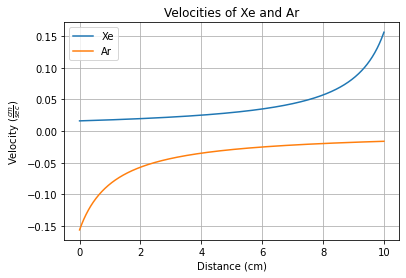

In [8]:
plt.plot(z,va,label='Xe')
plt.plot(z,vb,label='Ar')
plt.legend()
plt.grid()
plt.title('Velocities of Xe and Ar')
plt.xlabel('Distance (cm)')
plt.ylabel(''.join(['Velocity ',r'($\frac{cm}{sec}$)']))
;
print(va[-1],'\n',vb[-1])

At $z=L$,
</br></br>
$v_{Xe} = 0.156 \frac{cm}{sec}$
</br></br>
$v_{Ar} = -1.61e-2 \frac{cm}{sec}$

## Problem 3.4
At $z=L$, $v_M = 0$ as shown by
$$
v_M = \frac{N}{c} = \frac{0}{c}
$$

## Problem 3.5
The mass averaged velocity can be determined using
$$
v_m = \frac{\Sigma m_iv_i}{m_{tot}}
$$
$m_i$ can be determined by using the ideal gas law and the molar masses of each species
$$
m = nM
$$
where M is molar mass

0.11601992405297935


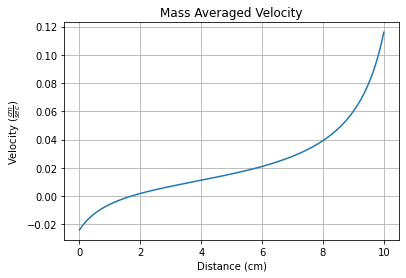

In [9]:
Mx = 131.29                                 #molar mass of xe g/mol
Ma = 39.948                                 #molar mass of ar g/mol
n = P*V0/R*T                                #number of moles of each species
mx = n*Mx                                   #mass xe g
ma = n*Ma                                   #mass ar g

vm = (mx*va+ma*vb)/(ma+mx)
plt.plot(z,vm)
plt.grid()
plt.title('Mass Averaged Velocity')
plt.xlabel('Distance (cm)')
plt.ylabel(''.join(['Velocity ',r'($\frac{cm}{sec}$)']));
print(vm[-1])

At $z=L$,
</br></br>
$v_m = 0.116 \frac{cm}{sec}$